In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/yellow_tripdata_2019-06.csv


In [56]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [57]:
taxi_data = pd.read_csv('../input/yellow_tripdata_2019-06.csv')
taxi_data = taxi_data.dropna()
taxi_data.shape

(6941024, 18)

In [58]:
# Delete all the trip distance which are 0 and less
taxi_data = taxi_data[taxi_data["trip_distance"] > 0]

In [59]:
taxi_data_final = taxi_data.sample(n= 200000)

taxi_data = taxi_data_final

taxi_data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1027026,2,2019-06-05 14:44:47,2019-06-05 14:51:49,1,1.10,1,N,263,236,1,7.0,0.0,0.5,1.00,0.0,0.3,11.30,2.5
2243593,1,2019-06-10 17:33:47,2019-06-10 17:39:53,1,1.20,1,N,68,234,1,6.0,3.5,0.5,2.05,0.0,0.3,12.35,2.5
4608012,1,2019-06-20 18:40:18,2019-06-20 18:49:56,0,1.60,1,N,239,236,1,8.5,3.5,0.5,1.60,0.0,0.3,14.40,2.5
6319231,1,2019-06-28 00:32:53,2019-06-28 00:46:11,1,2.60,1,N,186,141,1,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5
4501453,2,2019-06-20 11:14:49,2019-06-20 11:39:47,1,8.81,1,N,238,200,1,29.0,0.0,0.5,6.00,2.8,0.3,41.10,2.5


In [60]:
# Drop columns which we will not need
taxi_data_final.drop(["VendorID", "passenger_count", "RatecodeID","payment_type", "extra", "mta_tax","tip_amount", "tolls_amount","improvement_surcharge","congestion_surcharge", "fare_amount"], axis = 1, inplace = True) 
taxi_data_final.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,total_amount
7647,2019-06-01 00:38:41,2019-06-01 00:52:46,3.79,N,79,141,20.76
2334867,2019-06-11 07:03:26,2019-06-11 07:24:39,5.72,N,132,218,20.80
2750362,2019-06-12 20:36:29,2019-06-12 20:52:25,2.40,N,161,140,17.93
5203519,2019-06-23 09:35:44,2019-06-23 09:37:41,0.20,N,164,164,8.50
5602626,2019-06-25 08:53:24,2019-06-25 09:22:35,2.56,N,237,186,24.50
5454616,2019-06-24 14:02:30,2019-06-24 14:06:27,0.58,N,68,249,9.75
6794040,2019-06-30 02:35:21,2019-06-30 02:42:31,1.20,N,114,144,12.95
3517950,2019-06-15 22:26:11,2019-06-15 22:35:14,1.47,N,211,249,14.16
3739023,2019-06-17 06:34:26,2019-06-17 06:39:00,1.30,N,164,161,10.30
5036676,2019-06-22 14:27:15,2019-06-22 14:38:09,1.76,N,140,236,12.30


In [61]:

taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [62]:
# Get the travel time
from datetime import datetime
taxi_data['Travel_time'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

#taxi_data['Travel_time'] = taxi_data['Travel_time'].days * 24 * 3600
#return timedelta.days * 24 * 3600 + timedelta.seconds
#total_seconds()

# Convert Duration of trips into seconds
#taxi_data['Travel_time'] = str(taxi_data['Travel_time']).split(':')
#taxi_data.head(5)

In [63]:
taxi_data.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,total_amount,Travel_time
1027026,2019-06-05 14:44:47,2019-06-05 14:51:49,1.10,N,263,236,11.30,00:07:02
2243593,2019-06-10 17:33:47,2019-06-10 17:39:53,1.20,N,68,234,12.35,00:06:06
4608012,2019-06-20 18:40:18,2019-06-20 18:49:56,1.60,N,239,236,14.40,00:09:38
6319231,2019-06-28 00:32:53,2019-06-28 00:46:11,2.60,N,186,141,14.80,00:13:18
4501453,2019-06-20 11:14:49,2019-06-20 11:39:47,8.81,N,238,200,41.10,00:24:58
1836444,2019-06-08 18:25:18,2019-06-08 18:34:18,3.33,N,50,238,18.36,00:09:00
224401,2019-06-01 22:10:15,2019-06-01 22:13:10,0.66,N,162,170,9.96,00:02:55
1141639,2019-06-05 22:44:49,2019-06-05 22:48:08,1.16,N,263,75,11.44,00:03:19
2950153,2019-06-13 15:41:50,2019-06-13 15:55:34,2.39,N,236,229,17.00,00:13:44
1264072,2019-06-06 13:08:24,2019-06-06 13:17:30,1.50,N,238,142,13.00,00:09:06


In [64]:
def date_diff_in_Seconds(dt2, dt1):
    timedelta = dt2 - dt1
    return timedelta.days * 24 * 3600 + timedelta.seconds





In [65]:
result = [] 
for i in taxi_data.index:
    
    time_diff = date_diff_in_Seconds(taxi_data['tpep_dropoff_datetime'][i],taxi_data['tpep_pickup_datetime'][i] )
    #taxi_data['tpep_dropoff_datetime'][i] - taxi_data['tpep_pickup_datetime'][i]
    #taxi_data['Travel_time'][i]
    #print(type(time_diff))
    result.append(time_diff)
    #taxi_data.assign('Duration')[i] = time_diff
taxi_data['Duration'] = result

In [66]:
def findDay(df): 
    #day, month, year = df['tpep_pickup_datetime'].split(' ')   
    #day = datetime.datetime.strptime(df['tpep_pickup_datetime'],'%Y-%m-%d %H:%M:%S').weekday() 
    #born = datetime.datetime.strptime(date, '%d %m %Y').weekday() 
    weekday =  df['tpep_pickup_datetime'].dt.dayofweek
    return weekday                   
    #return day.strftime("%A")


In [67]:
# Get the travel time
#taxi_data['Day'] = taxi_data.apply(findDay, axis=1)


taxi_data['weekday'] = taxi_data['tpep_pickup_datetime'].dt.dayofweek



In [68]:
taxi_data.loc[taxi_data['weekday'] == 0, 'weekday'] = 'Monday'
taxi_data.loc[taxi_data['weekday'] == 1, 'weekday'] = 'Tuesday'
taxi_data.loc[taxi_data['weekday'] == 2, 'weekday'] = 'Wednesday'
taxi_data.loc[taxi_data['weekday'] == 3, 'weekday'] = 'Thursday'
taxi_data.loc[taxi_data['weekday'] == 4, 'weekday'] = 'Friday'
taxi_data.loc[taxi_data['weekday'] == 5, 'weekday'] = 'Saturday'
taxi_data.loc[taxi_data['weekday'] == 6, 'weekday'] = 'Sunday'


In [69]:
taxi_data.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,total_amount,Travel_time,Duration,weekday
1027026,2019-06-05 14:44:47,2019-06-05 14:51:49,1.10,N,263,236,11.30,00:07:02,422,Wednesday
2243593,2019-06-10 17:33:47,2019-06-10 17:39:53,1.20,N,68,234,12.35,00:06:06,366,Monday
4608012,2019-06-20 18:40:18,2019-06-20 18:49:56,1.60,N,239,236,14.40,00:09:38,578,Thursday
6319231,2019-06-28 00:32:53,2019-06-28 00:46:11,2.60,N,186,141,14.80,00:13:18,798,Friday
4501453,2019-06-20 11:14:49,2019-06-20 11:39:47,8.81,N,238,200,41.10,00:24:58,1498,Thursday


In [70]:
#taxi_data.loc[taxi_data['tpep_pickup_datetime'].dt.hour >= 5, 'TimeofDay'] = 'Morning'
taxi_data['TimeofDay'] = taxi_data['tpep_pickup_datetime'].dt.hour

In [71]:
#taxi_data.loc[taxi_data['TimeofDay'] >= 5 & taxi_data.loc['TimeofDay'] <= 11, 'weekday'] = 'morning'
#df1 = df[(df.a != -1) & (df.b != -1)]
#len(taxi_data)
#taxi_data[(taxi_data.TimeofDay >= 5) & (taxi_data.TimeofDay <= 11)] #= 'morning'
#taxi_data[(taxi_data.TimeofDay >= 12) & (taxi_data.TimeofDay <= 17)] = 'afternoon'
#taxi_data[(taxi_data.TimeofDay >= 18) & (taxi_data.TimeofDay <= 22)] = 'evening'
#taxi_data[(taxi_data.TimeofDay >= 23) & (taxi_data.TimeofDay <= 0)] = 'night'
#taxi_data['TimeofDay1'] = []
for i in taxi_data.index:
    if (taxi_data['TimeofDay'][i] >= 5) & (taxi_data['TimeofDay'][i] <= 11):
        taxi_data['TimeofDay'][i] = 'morning' 
    elif (taxi_data['TimeofDay'][i] >= 12) & (taxi_data['TimeofDay'][i] <= 17):
        taxi_data['TimeofDay'][i] = 'afternoon'
    elif (taxi_data['TimeofDay'][i] >= 18) & (taxi_data['TimeofDay'][i] <= 20):
        taxi_data['TimeofDay'][i] = 'evening'
    
    else:
        taxi_data['TimeofDay'][i] = 'night'
    
    
#for ind in df.index: 
#     print(df['Name'][ind], df['Stream'][ind]) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/con

In [72]:
taxi_data.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,total_amount,Travel_time,Duration,weekday,TimeofDay
1027026,2019-06-05 14:44:47,2019-06-05 14:51:49,1.10,N,263,236,11.30,00:07:02,422,Wednesday,afternoon
2243593,2019-06-10 17:33:47,2019-06-10 17:39:53,1.20,N,68,234,12.35,00:06:06,366,Monday,afternoon
4608012,2019-06-20 18:40:18,2019-06-20 18:49:56,1.60,N,239,236,14.40,00:09:38,578,Thursday,evening
6319231,2019-06-28 00:32:53,2019-06-28 00:46:11,2.60,N,186,141,14.80,00:13:18,798,Friday,night
4501453,2019-06-20 11:14:49,2019-06-20 11:39:47,8.81,N,238,200,41.10,00:24:58,1498,Thursday,morning


In [74]:
os.chdir("/kaggle/working/")

In [75]:
taxi_data.to_csv('taxi_clean_data.csv')

In [76]:
taxi_data_test = pd.read_csv('taxi_clean_data.csv')

In [ ]:
taxi_data_test.head()

In [54]:
# Drop columns which we will not need
#taxi_data.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime", "store_and_fwd_flag","Travel_time", "PULocationID","DOLocationID"])
#taxi_data_final.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime", "store_and_fwd_flag","Travel_time", "PULocationID","DOLocationID"], axis = 1, inplace = True)
taxi_data.tail(10)

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,total_amount,Travel_time,Duration,weekday,TimeofDay
199990,4097281,2019-06-18 17:56:53,2019-06-18 18:20:10,1.30,N,68,107,21.95,0 days 00:23:17.000000000,1397,Tuesday,afternoon
199991,883684,2019-06-04 21:06:59,2019-06-04 21:17:48,1.85,N,151,41,10.80,0 days 00:10:49.000000000,649,Tuesday,night
199992,2009605,2019-06-09 15:26:11,2019-06-09 15:29:18,0.56,N,143,48,8.30,0 days 00:03:07.000000000,187,Sunday,afternoon
199993,1868929,2019-06-08 21:26:01,2019-06-08 21:34:57,1.20,N,161,186,14.10,0 days 00:08:56.000000000,536,Saturday,night
199994,5143924,2019-06-22 23:34:03,2019-06-22 23:46:48,2.16,N,234,50,15.46,0 days 00:12:45.000000000,765,Saturday,night
199995,840224,2019-06-04 18:56:11,2019-06-04 18:59:42,0.30,N,236,236,9.95,0 days 00:03:31.000000000,211,Tuesday,evening
199996,284842,2019-06-02 06:36:28,2019-06-02 07:03:20,8.30,N,170,85,36.95,0 days 00:26:52.000000000,1612,Sunday,morning
199997,3946694,2019-06-18 03:07:28,2019-06-18 03:17:25,1.90,N,151,75,12.42,0 days 00:09:57.000000000,597,Tuesday,night
199998,5202788,2019-06-23 09:37:10,2019-06-23 09:42:00,1.06,N,261,231,8.80,0 days 00:04:50.000000000,290,Sunday,morning
199999,4268967,2019-06-19 12:57:26,2019-06-19 13:04:01,1.00,N,163,142,9.30,0 days 00:06:35.000000000,395,Wednesday,afternoon


In [ ]:
from sklearn.model_selection import train_test_split

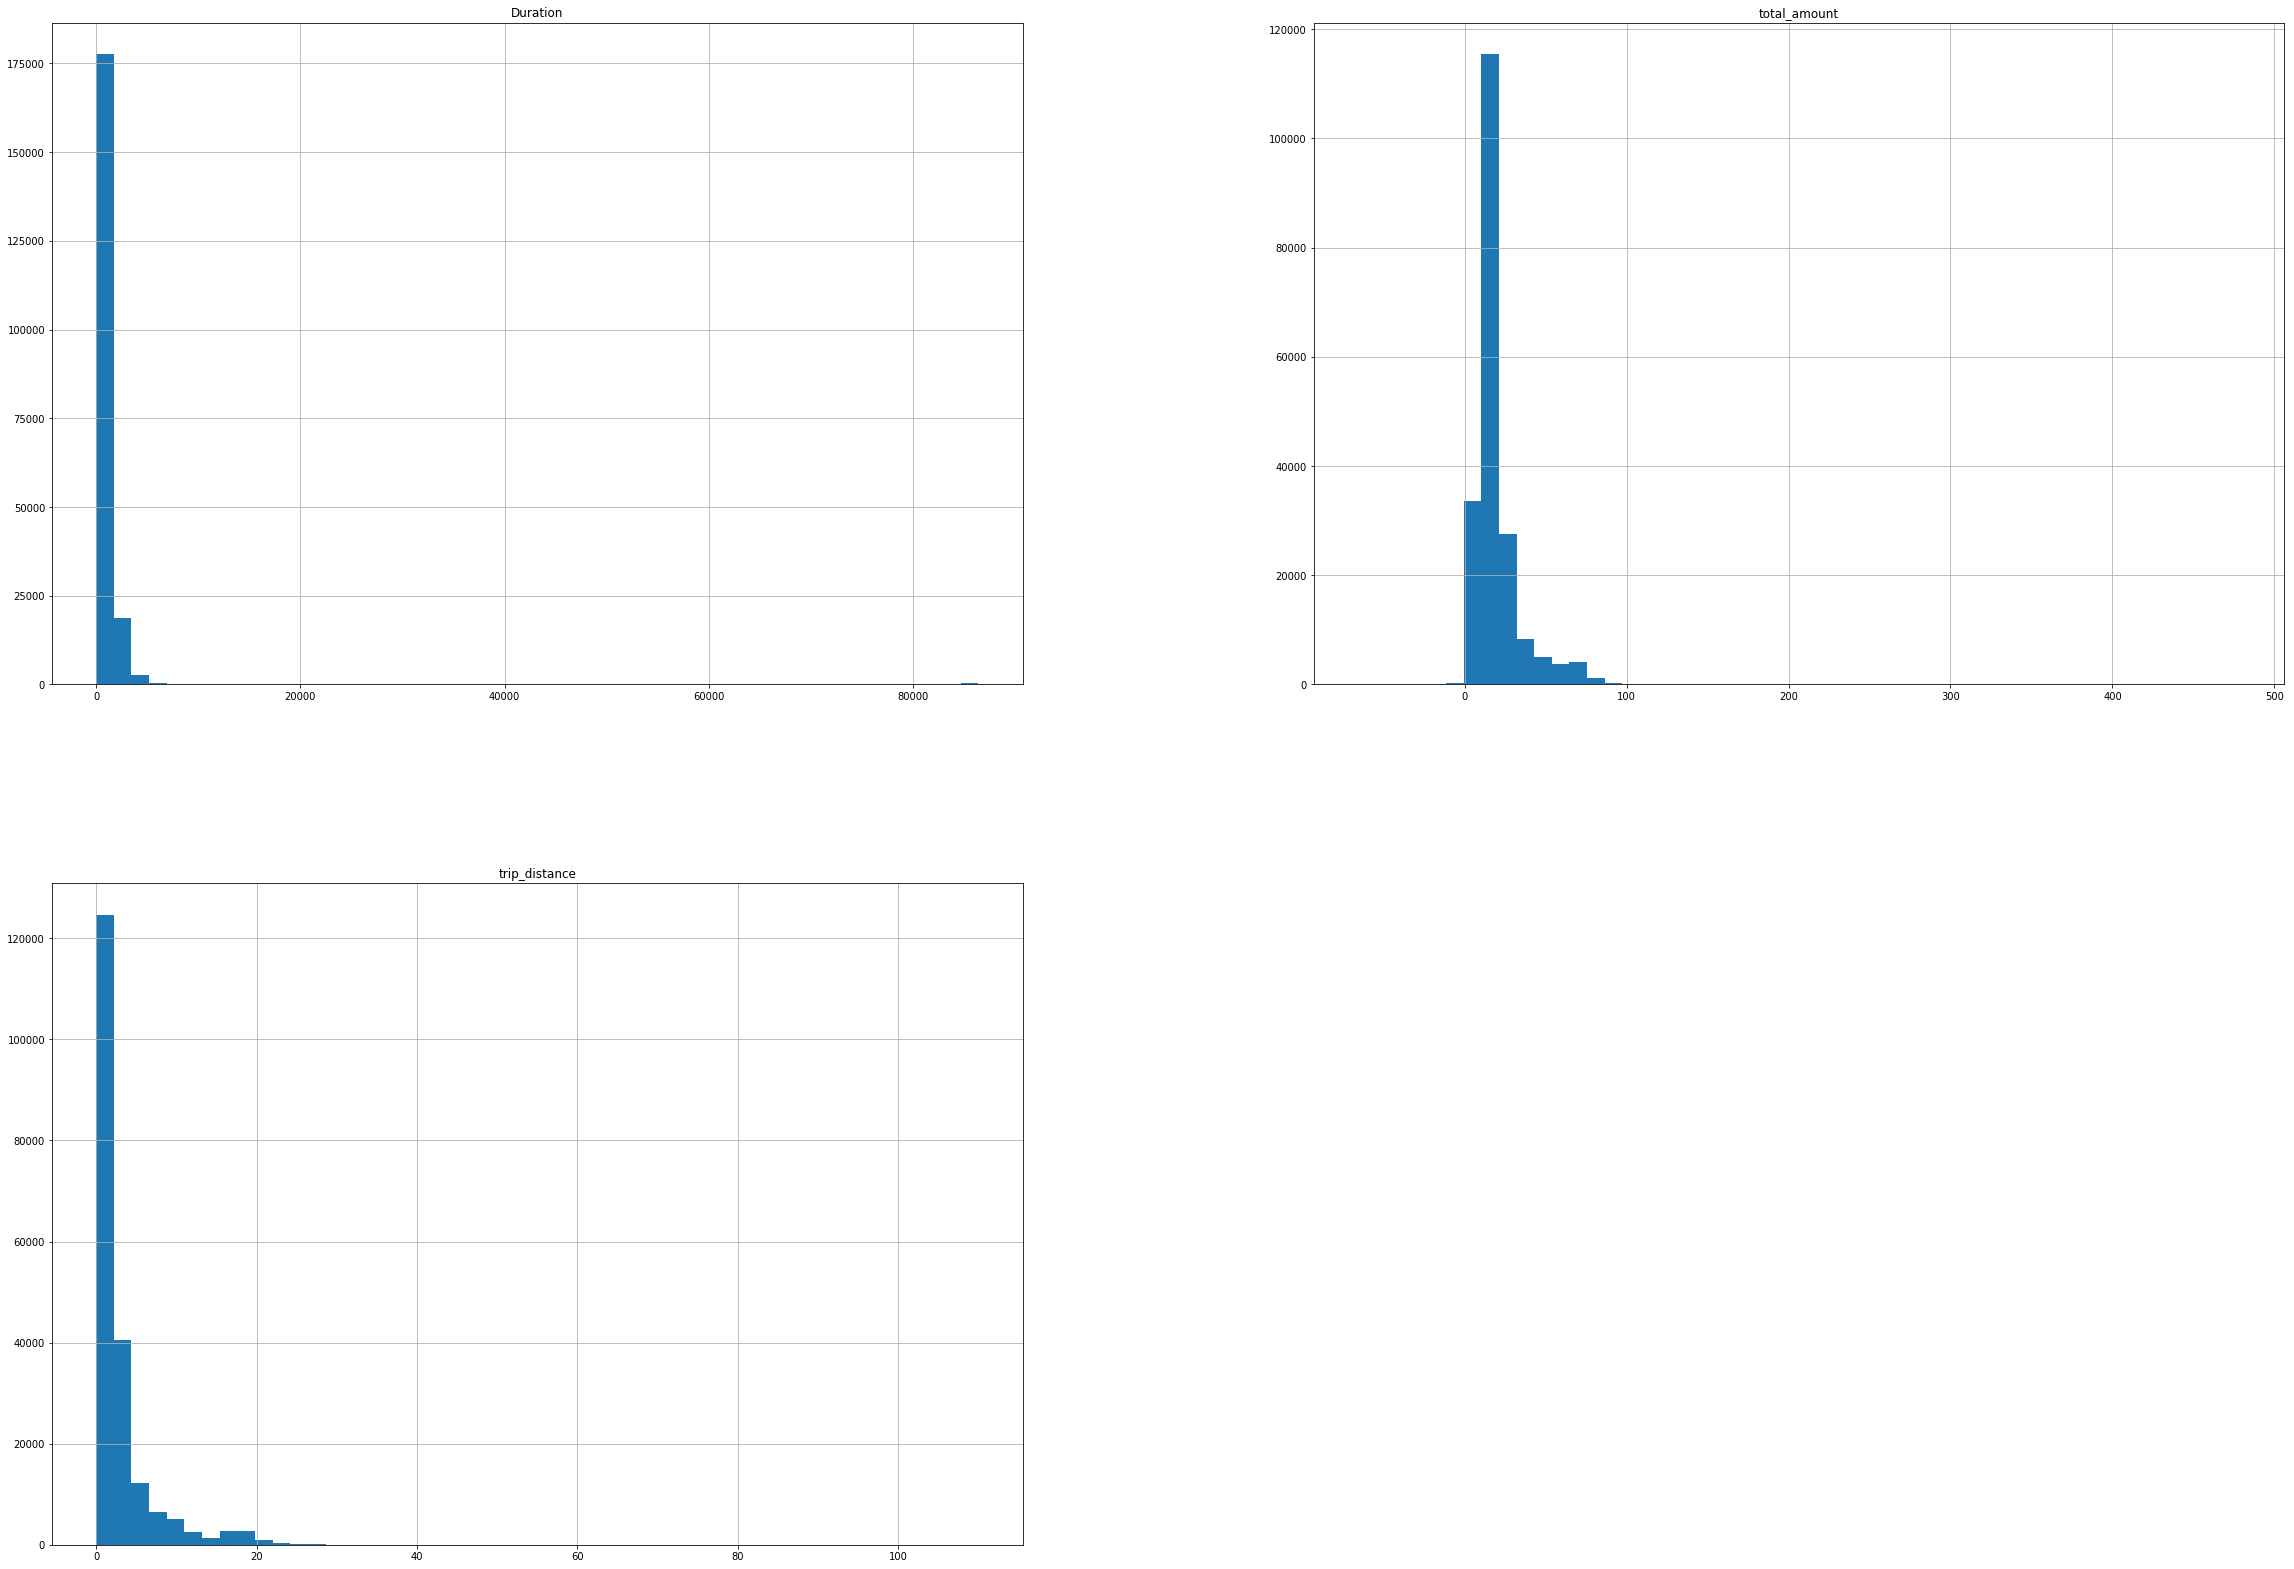

In [23]:
%matplotlib inline
taxi_data.hist(bins=50,figsize=(40,28))
plt.show()

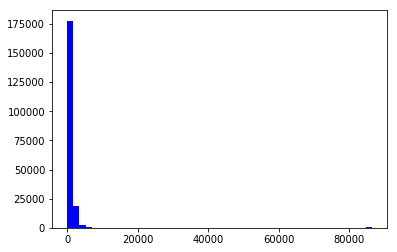

In [24]:
%matplotlib inline
nbins=50
nbins,plt.hist(taxi_data['Duration'],nbins,facecolor='blue')
plt.show()

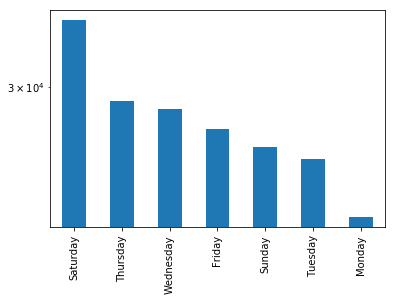

In [25]:
%matplotlib inline
taxi_data['weekday'].value_counts().plot(kind='bar')
plt.yscale('log')
plt.show()

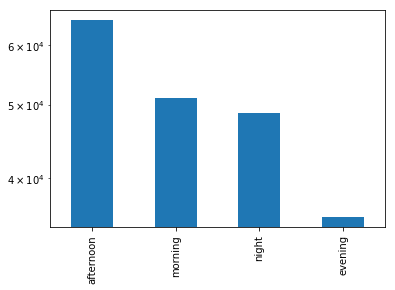

In [26]:
%matplotlib inline
taxi_data['TimeofDay'].value_counts().plot(kind='bar')
plt.yscale('log')
plt.show()

In [27]:
corr_mat=taxi_data.select_dtypes(['float', 'int']).corr()
#mask = np.zeros_like(corr_mat, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#f, ax = plt.subplots(figsize=(11, 9))
#cmap = sns.diverging_palette(220, 10, as_cmap=True,center="light")
#sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
corr_mat

,trip_distance,total_amount,Duration
trip_distance,1.000000,0.915026,0.148521
total_amount,0.915026,1.000000,0.151341
Duration,0.148521,0.151341,1.000000


In [29]:
corr_mat["Duration"].sort_values(ascending=False)

Duration         1.000000
total_amount     0.151341
trip_distance    0.148521
Name: Duration, dtype: float64

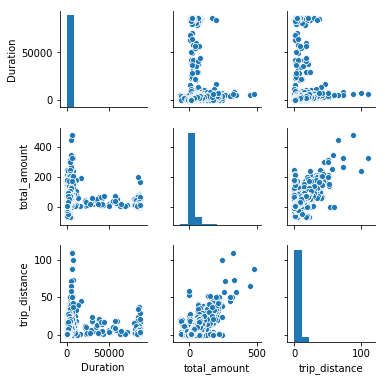

In [31]:
cols =corr_mat["Duration"].sort_values(ascending=False).index.tolist()[0:10]#select the first 10 in desceding order variables that have positive correlation
sns.pairplot(taxi_data[cols], height = 1.8)
plt.show()

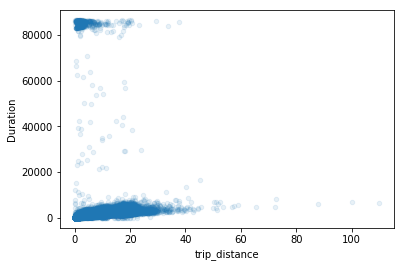

In [32]:
taxi_data.plot('trip_distance', 'Duration', kind = 'scatter', marker = 'o',alpha=.1);

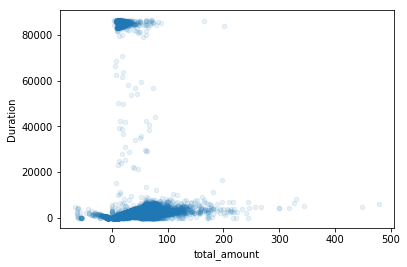

In [33]:
taxi_data.plot('total_amount', 'Duration', kind = 'scatter', marker = 'o',alpha=.1);

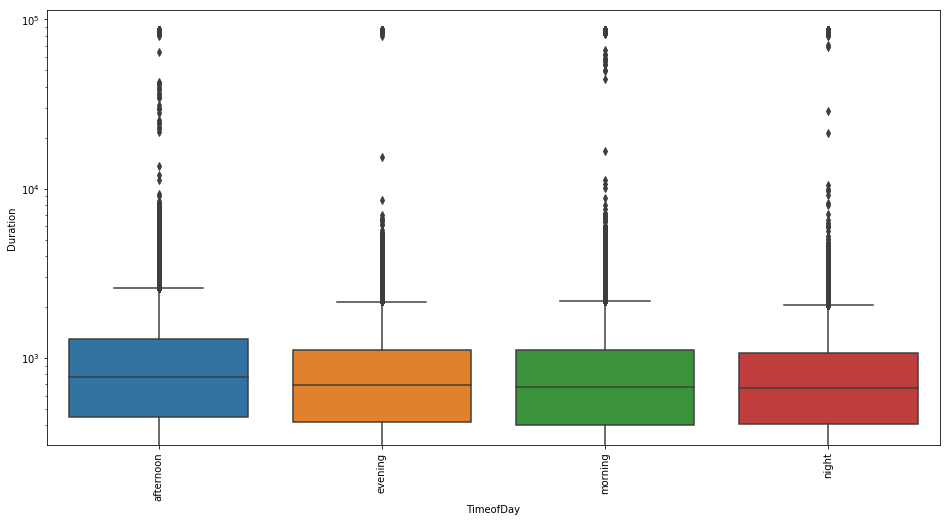

In [34]:
var = 'TimeofDay'
data = pd.concat([taxi_data['Duration'], taxi_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Duration", data=data)
#fig.axis(ymin=25000
, ymax=1000000);
ax.set_yscale('log')
plt.xticks(rotation=90);

OverflowError: cannot convert float infinity to integer

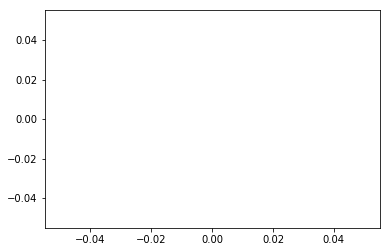

In [41]:
#histogram and normal probability plot
sns.distplot(taxi_data['Duration'],fit='expon')
fig = plt.figure()
res = stats.probplot(taxi_data['Duration'], plot=plt)

In [36]:
taxi_data['Duration'] = np.log(taxi_data['Duration'])

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:

from scipy.stats import norm

from scipy.stats import expon

OverflowError: cannot convert float infinity to integer

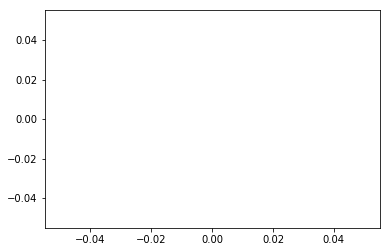

In [40]:
#histogram and normal probability plot
sns.distplot(taxi_data['Duration'],fit=expon)
fig = plt.figure()
res = stats.probplot(taxi_data['Duration'], plot=plt)

In [43]:
taxi_data_dummy =pd.get_dummies(taxi_data)

In [44]:
taxi_data_dummy.head()

,trip_distance,total_amount,Duration,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,TimeofDay_afternoon,TimeofDay_evening,TimeofDay_morning,TimeofDay_night
785651,0.50,9.80,5.849325,0,0,0,0,0,1,0,1,0,0,0
4374031,1.60,12.36,5.575949,0,0,0,0,0,0,1,0,1,0,0
5056765,0.54,6.36,5.087596,0,0,1,0,0,0,0,1,0,0,0
6687413,0.63,11.76,6.159095,0,0,1,0,0,0,0,1,0,0,0
1121807,0.60,8.80,5.587249,0,0,0,0,0,0,1,0,1,0,0


In [46]:
def split_train_val(data,ratio,seedme):
    np.random.seed(seedme)#in order to have consistency and reproducibility in the results 
    shuffleme = np.random.permutation(len(data))
    val_set_size  = int(len(data)*ratio)
    val_indices   = shuffleme[:val_set_size]
    train_indices = shuffleme[val_set_size:]
    return data.iloc[train_indices],data.iloc[val_indices]
train_set,val_set = split_train_val(taxi_data_dummy,0.2,666)
print("Train set: ",len(train_set),", validation set: ",len(val_set))

Train set:  160000 , validation set:  40000


In [47]:
x_train = train_set.loc[:, train_set.columns != 'Duration']
y_train = train_set.Duration
x_val   = val_set.loc[:, val_set.columns != 'Duration']
y_val   = val_set.Duration
print("x_train : " + str(x_train.shape))
print("x_val : " + str(x_val.shape))
print("y_train : " + str(y_train.shape))
print("y_val : " + str(y_val.shape))

x_train : (160000, 13)
x_val : (40000, 13)
y_train : (160000,)
y_val : (40000,)


In [49]:
from sklearn.linear_model import Ridge,LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_val_pred   = lr.predict(x_val)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [42]:
taxi_data.head()

,trip_distance,total_amount,Duration,weekday,TimeofDay
785651,0.50,9.80,5.849325,Tuesday,afternoon
4374031,1.60,12.36,5.575949,Wednesday,evening
5056765,0.54,6.36,5.087596,Saturday,afternoon
6687413,0.63,11.76,6.159095,Saturday,afternoon
1121807,0.60,8.80,5.587249,Wednesday,evening
